<a href="https://colab.research.google.com/github/Pratim38pal/Machine-Learning-Projects/blob/main/Calories_Burnt_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [4]:
calories=pd.read_csv('calories.csv')
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


from matplotlib import pyplot as plt
_df_0['User_ID'].plot(kind='hist', bins=20, title='User_ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Calories'].plot(kind='hist', bins=20, title='Calories')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='User_ID', y='Calories', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['User_ID'].plot(kind='line', figsize=(8, 4), title='User_ID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['Calories'].plot(kind='line', figsize=(8, 4), title='Calories')
plt.gca().spines[['top', 'right']].set_visible(False)

In [5]:
exercise_data=pd.read_csv('exercise.csv')
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [7]:
calories_data=pd.concat([exercise_data,calories['Calories']],axis=1)
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [9]:
calories_data.shape

(15000, 9)

In [10]:
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [11]:
calories_data.isnull().sum()

,0
User_ID,0
Gender,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0
Calories,0


In [12]:
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [13]:
sns.set()

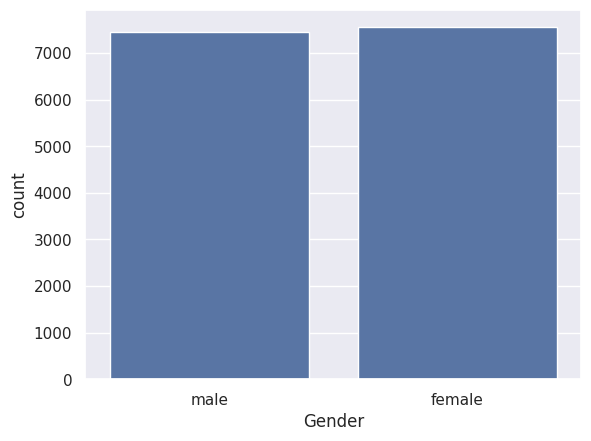

In [14]:
sns.countplot(x='Gender',data=calories_data)
plt.show()

<ipython-input-15-5f449a0d8899>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Age'])


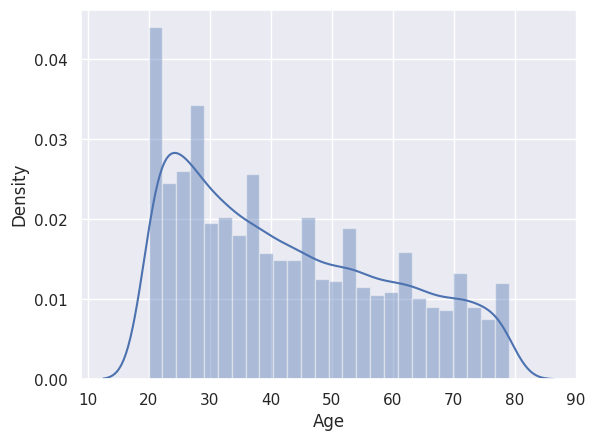

In [15]:
sns.distplot(calories_data['Age'])
plt.show()

<ipython-input-16-d885a23cb295>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Height'])


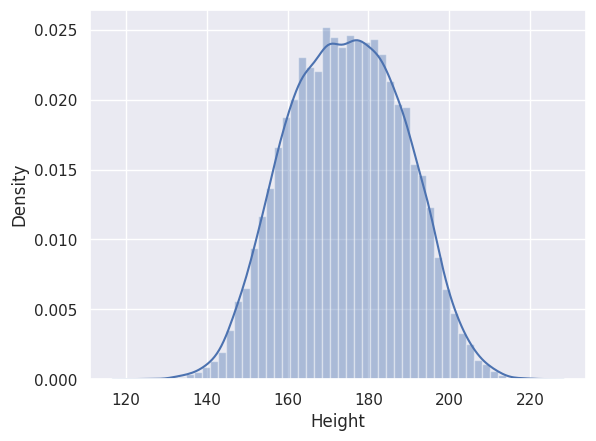

In [16]:
sns.distplot(calories_data['Height'])
plt.show()

<ipython-input-17-c77ba57e0700>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Weight'])


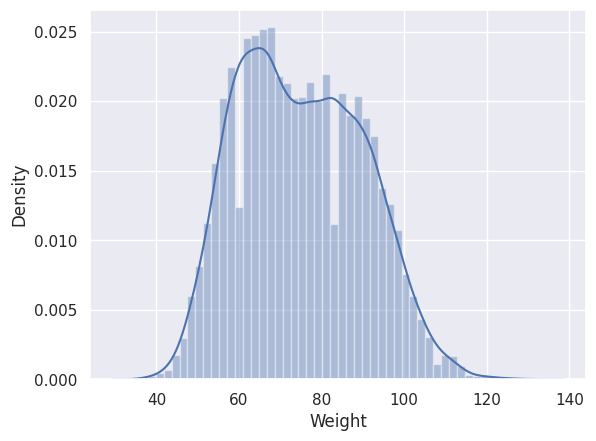

In [17]:
sns.distplot(calories_data['Weight'])
plt.show()

In [19]:
# Convert 'Gender' column to numerical representation using one-hot encoding
calories_data = pd.get_dummies(calories_data, columns=['Gender'])

# Calculate the correlation matrix
correlation = calories_data.corr()

<Axes: >

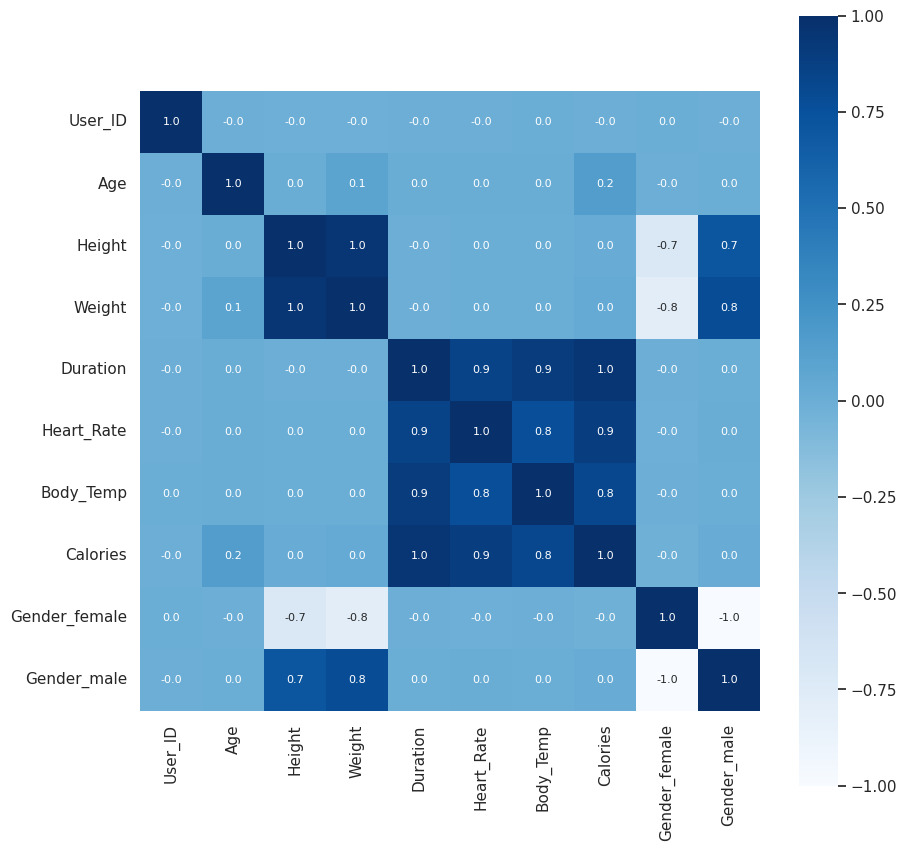

In [20]:
# constructing a heatmap to understand the correlation

plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')


In [21]:
calories_data.replace({'Gender':{'male':0,'female':1}}, inplace=True)

In [22]:
calories_data.head()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Gender_female,Gender_male
0,14733363,68,190.0,94.0,29.0,105.0,40.8,231.0,False,True
1,14861698,20,166.0,60.0,14.0,94.0,40.3,66.0,True,False
2,11179863,69,179.0,79.0,5.0,88.0,38.7,26.0,False,True
3,16180408,34,179.0,71.0,13.0,100.0,40.5,71.0,True,False
4,17771927,27,154.0,58.0,10.0,81.0,39.8,35.0,True,False


In [23]:
X=calories_data.drop(columns=['User_ID','Calories'],axis=1)
Y=calories_data['Calories']

In [24]:
print(X)

       Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Gender_female  \
0       68   190.0    94.0      29.0       105.0       40.8          False   
1       20   166.0    60.0      14.0        94.0       40.3           True   
2       69   179.0    79.0       5.0        88.0       38.7          False   
3       34   179.0    71.0      13.0       100.0       40.5           True   
4       27   154.0    58.0      10.0        81.0       39.8           True   
...    ...     ...     ...       ...         ...        ...            ...   
14995   20   193.0    86.0      11.0        92.0       40.4           True   
14996   27   165.0    65.0       6.0        85.0       39.2           True   
14997   43   159.0    58.0      16.0        90.0       40.1           True   
14998   78   193.0    97.0       2.0        84.0       38.3          False   
14999   63   173.0    79.0      18.0        92.0       40.5          False   

       Gender_male  
0             True  
1            False  


In [25]:
print(Y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


In [26]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [28]:
print(X.shape,X_train.shape,X_test.shape)
print(Y.shape,Y_train.shape,Y_test.shape)

(15000, 8) (12000, 8) (3000, 8)
(15000,) (12000,) (3000,)


In [30]:
model=XGBRegressor()

In [31]:
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [32]:
model.score(X_train,Y_train)*100 , model.score(X_test,Y_test)*100

(99.95691477017405, 99.8799522480255)

In [35]:
test_data_prediction = model.predict(X_test)
print(test_data_prediction)

[125.58828  222.11377   38.725952 ... 144.3179    23.425894  90.100494]


# Mean Absolute Error

In [36]:
mae = metrics.mean_absolute_error(Y_test, test_data_prediction)
print('Mean Absolute Error:', mae)

Mean Absolute Error: 1.4836762582858403


In [37]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [39]:
# Merging the datasets on User_ID
merged_df = pd.merge(exercise_data, calories, on='User_ID')

# Display the first few rows of the merged dataset
merged_head = merged_df.head()
merged_info = merged_df.info()

merged_head, merged_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


(    User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
 0  14733363    male   68   190.0    94.0      29.0       105.0       40.8   
 1  14861698  female   20   166.0    60.0      14.0        94.0       40.3   
 2  11179863    male   69   179.0    79.0       5.0        88.0       38.7   
 3  16180408  female   34   179.0    71.0      13.0       100.0       40.5   
 4  17771927  female   27   154.0    58.0      10.0        81.0       39.8   
 
    Calories  
 0     231.0  
 1      66.0  
 2      26.0  
 3      71.0  
 4      35.0  ,
 None)

In [41]:
# Encoding categorical variable (Gender)
label_encoder = LabelEncoder()
merged_df['Gender'] = label_encoder.fit_transform(merged_df['Gender'])

# Defining features and target variable
X = merged_df.drop(columns=['User_ID', 'Calories'])
y = merged_df['Calories']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training the RandomForestRegressor model
model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

# Predicting on the test set
y_pred = model.predict(X_test_scaled)

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mae, r2

(1.7110266666666667, 0.9982327479735451)

In [46]:
# Sample input data for prediction
sample_input = {
    'Gender': 'female',  # Categorical feature
    'Age': 30,
    'Height': 165.0,
    'Weight': 70.0,
    'Duration': 20.0,
    'Heart_Rate': 95.0,
    'Body_Temp': 39.0
}

# Convert sample input to DataFrame
sample_df = pd.DataFrame([sample_input])

# Encode the categorical feature (Gender)
sample_df['Gender'] = label_encoder.transform(sample_df['Gender'])

# Standardize the input data
sample_scaled = scaler.transform(sample_df)

# Predict the calories burnt
predicted_calories = model.predict(sample_scaled)[0]
predicted_calories
